In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
output_dir = "C:/Users/hp/Desktop/McDonald's Menu"
os.makedirs(output_dir, exist_ok=True)

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\menu.csv')
print(df.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [5]:
print(df.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [7]:
print("Null values:\n", df.isnull().sum())

Null values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [9]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [11]:
df['Serving Size (g/ml)'] = df['Serving Size'].apply(lambda x: float(re.findall(r'\d+', x)[0]))

In [13]:
df['Calories from Protein'] = df['Protein'] * 4
df['Calories from Carbohydrates'] = df['Carbohydrates'] * 4
df['Calories from Fat'] = df['Total Fat'] * 9

In [15]:
columns_to_analyze = ['Calories', 'Total Fat', 'Sugars', 'Protein']
statistics_to_compute = ['mean', 'median', 'min', 'max']
summary_stats = df.groupby('Category')[columns_to_analyze].agg(statistics_to_compute)
print("Summary Statistics by Category:\n", summary_stats)

Summary Statistics by Category:
                       Calories                    Total Fat              \
                          mean median  min   max       mean median  min   
Category                                                                  
Beef & Pork         494.000000  500.0  240   750  24.866667   26.0  8.0   
Beverages           113.703704  100.0    0   280   0.092593    0.0  0.0   
Breakfast           526.666667  470.0  150  1150  27.690476   26.0  4.0   
Chicken & Fish      552.962963  480.0  190  1880  26.962963   21.0  9.0   
Coffee & Tea        283.894737  270.0    0   760   8.021053    7.0  0.0   
Desserts            222.142857  250.0   45   340   7.357143    8.0  1.5   
Salads              270.000000  255.0  140   450  11.750000    8.0  4.5   
Smoothies & Shakes  531.428571  540.0  210   930  14.125000   16.0  0.5   
Snacks & Sides      245.769231  260.0   15   510  10.538462   11.0  0.0   

                              Sugars                    Protein   

In [17]:
category_rank = df.groupby('Category')['Calories'].mean().sort_values()
print("Category Rank by Average Calories:\n", category_rank)

Category Rank by Average Calories:
 Category
Beverages             113.703704
Desserts              222.142857
Snacks & Sides        245.769231
Salads                270.000000
Coffee & Tea          283.894737
Beef & Pork           494.000000
Breakfast             526.666667
Smoothies & Shakes    531.428571
Chicken & Fish        552.962963
Name: Calories, dtype: float64


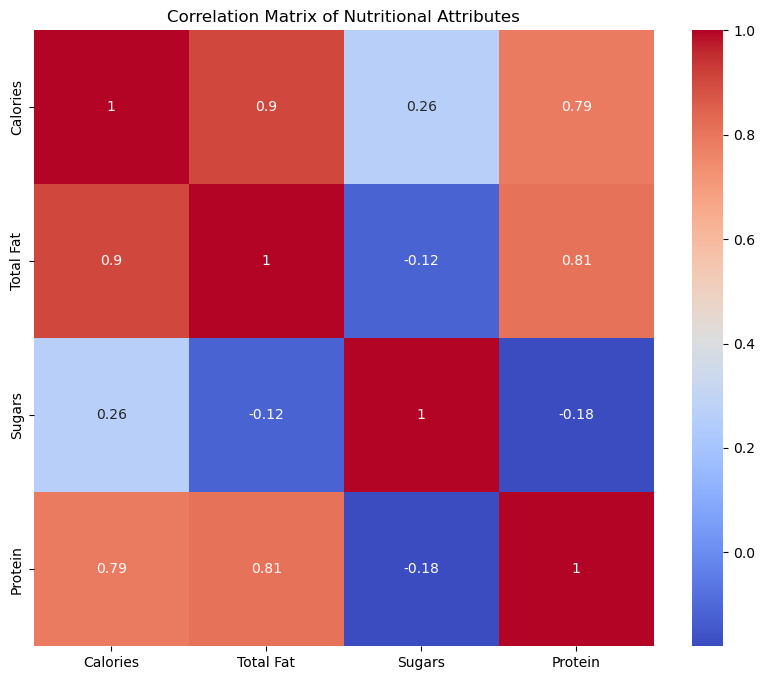

In [19]:
corr_matrix = df[['Calories', 'Total Fat', 'Sugars', 'Protein']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Attributes')
plt.savefig(os.path.join(output_dir, 'correlation_matrix.png'))
plt.show()

In [23]:
df['High Risk'] = (df['Calories'] > 600) | (df['Sugars'] > 30) | (df['Total Fat (% Daily Value)'] > 50)
df['Health Risk Score'] = df['Saturated Fat'] + df['Sodium'] + df['Sugars']
high_risk_items = df[df['Health Risk Score'] > 100]
print("High Risk Items:\n", high_risk_items[['Item', 'Calories', 'Sugars', 'Total Fat', 'Health Risk Score']])

High Risk Items:
                                                   Item  Calories  Sugars  \
0                                         Egg McMuffin       300       3   
1                                    Egg White Delight       250       3   
2                                     Sausage McMuffin       370       2   
3                            Sausage McMuffin with Egg       450       2   
4                     Sausage McMuffin with Egg Whites       400       2   
..                                                 ...       ...     ...   
255                 McFlurry with Oreo Cookies (Small)       510      64   
256                McFlurry with Oreo Cookies (Medium)       690      85   
257                 McFlurry with Oreo Cookies (Snack)       340      43   
258  McFlurry with Reese's Peanut Butter Cups (Medium)       810     103   
259   McFlurry with Reese's Peanut Butter Cups (Snack)       410      51   

     Total Fat  Health Risk Score  
0         13.0              758.0

In [25]:
df['% Calories from Fat'] = (df['Calories from Fat'] / df['Calories']) * 100
df['% Calories from Protein'] = (df['Calories from Protein'] / df['Calories']) * 100
df['% Calories from Carbohydrates'] = (df['Calories from Carbohydrates'] / df['Calories']) * 100

C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\transforms.py:2049: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)
C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\transforms.py:2049: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


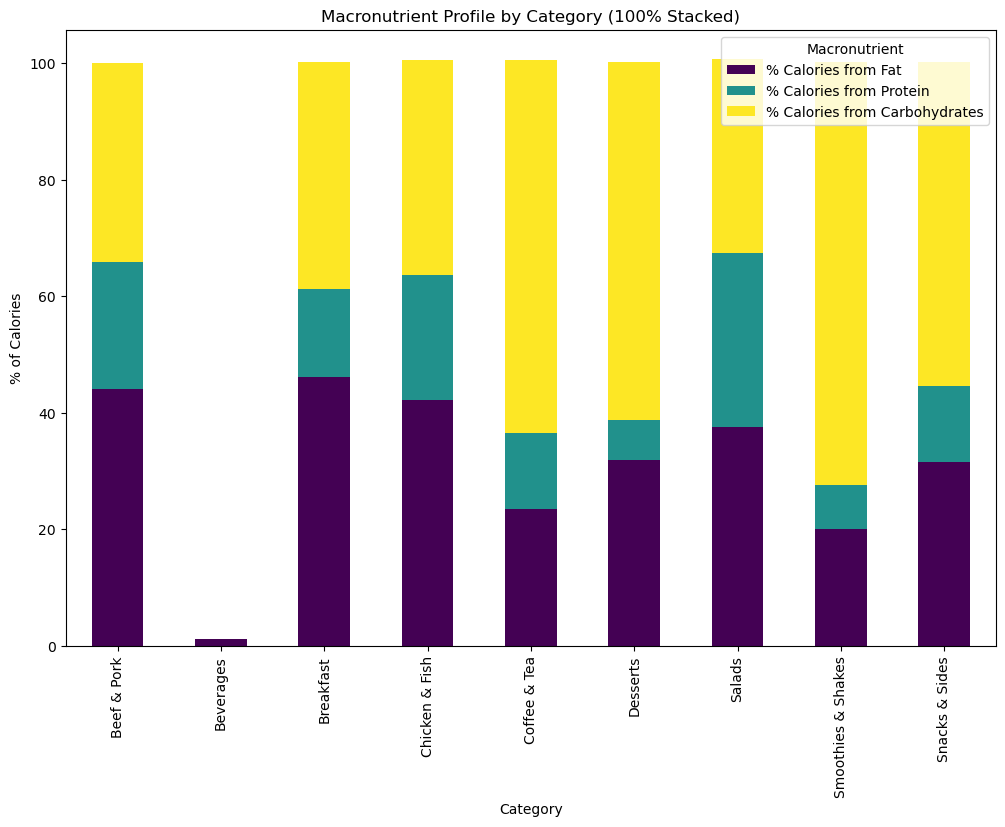

In [27]:
macronutrient_profile = df.groupby('Category')[['% Calories from Fat', '% Calories from Protein', '% Calories from Carbohydrates']].mean()
macronutrient_profile.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Macronutrient Profile by Category (100% Stacked)')
plt.ylabel('% of Calories')
plt.xlabel('Category')
plt.legend(title='Macronutrient')
plt.savefig(os.path.join(output_dir, 'macronutrient_profile_by_category.png'))
plt.show()

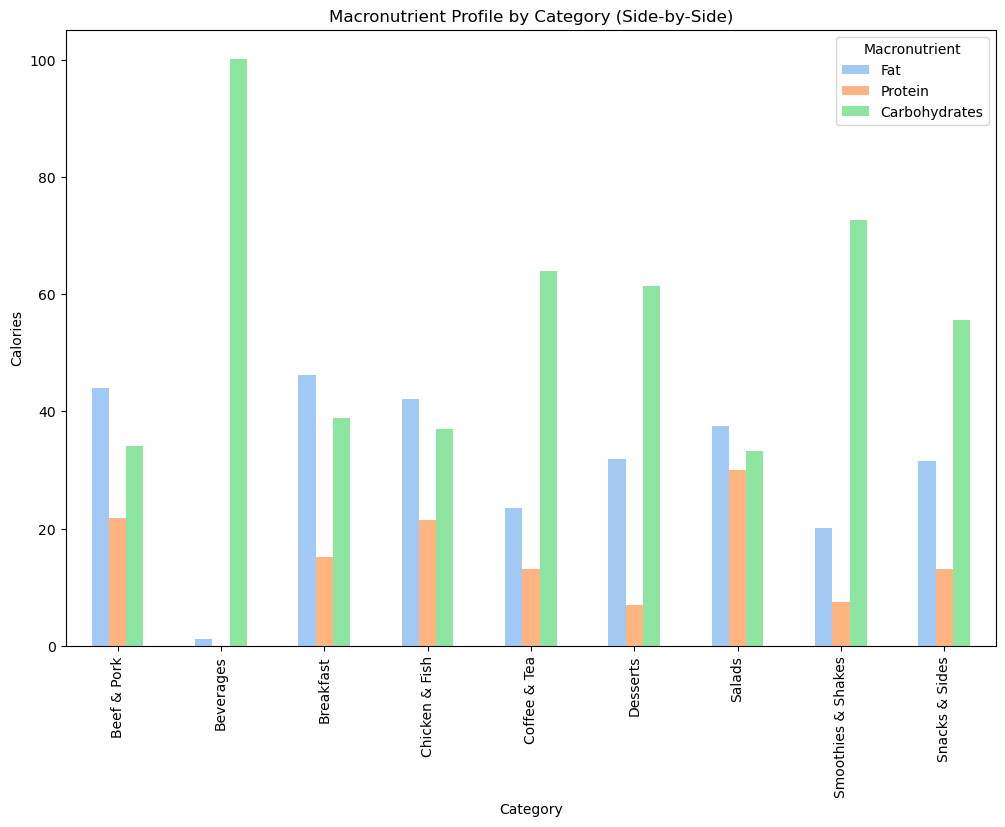

In [29]:
custom_palette = sns.color_palette("pastel")
macronutrient_profile.plot(kind='bar', figsize=(12, 8), color=custom_palette)
plt.title('Macronutrient Profile by Category (Side-by-Side)')
plt.ylabel('Calories')
plt.xlabel('Category')
plt.legend(title='Macronutrient', labels=['Fat', 'Protein', 'Carbohydrates'])
plt.savefig(os.path.join(output_dir, 'macronutrient_profile_by_category_side_by_side.png'))
plt.show()

In [31]:
breakfast_items = df[df['Category'] == 'Breakfast']
high_saturated_fat_items = breakfast_items[breakfast_items['Saturated Fat'] > 10]
print("Breakfast Items with High Saturated Fat:\n", high_saturated_fat_items[['Item', 'Saturated Fat']])

Breakfast Items with High Saturated Fat:
                                                  Item  Saturated Fat
6       Bacon, Egg & Cheese Biscuit (Regular Biscuit)           13.0
7         Bacon, Egg & Cheese Biscuit (Large Biscuit)           14.0
8   Bacon, Egg & Cheese Biscuit with Egg Whites (R...           11.0
9   Bacon, Egg & Cheese Biscuit with Egg Whites (L...           12.0
10                  Sausage Biscuit (Regular Biscuit)           12.0
11                    Sausage Biscuit (Large Biscuit)           13.0
12         Sausage Biscuit with Egg (Regular Biscuit)           14.0
13           Sausage Biscuit with Egg (Large Biscuit)           15.0
14  Sausage Biscuit with Egg Whites (Regular Biscuit)           12.0
15    Sausage Biscuit with Egg Whites (Large Biscuit)           13.0
18              Steak & Egg Biscuit (Regular Biscuit)           16.0
22                   Sausage, Egg & Cheese McGriddles           12.0
24                          Bacon, Egg & Cheese Bagel        

In [33]:
healthy_items = df[(df['Protein'] > 10) & (df['Sugars'] < 10)]
print("Healthy Items to Promote:\n", healthy_items[['Item', 'Protein', 'Sugars']])

Healthy Items to Promote:
                                           Item  Protein  Sugars
0                                 Egg McMuffin       17       3
1                            Egg White Delight       18       3
2                             Sausage McMuffin       14       2
3                    Sausage McMuffin with Egg       21       2
4             Sausage McMuffin with Egg Whites       21       2
..                                         ...      ...     ...
91   Chipotle BBQ Snack Wrap (Grilled Chicken)       16       7
92   Honey Mustard Snack Wrap (Crispy Chicken)       14       3
93  Honey Mustard Snack Wrap (Grilled Chicken)       16       2
94           Ranch Snack Wrap (Crispy Chicken)       15       3
95          Ranch Snack Wrap (Grilled Chicken)       16       2

[61 rows x 3 columns]


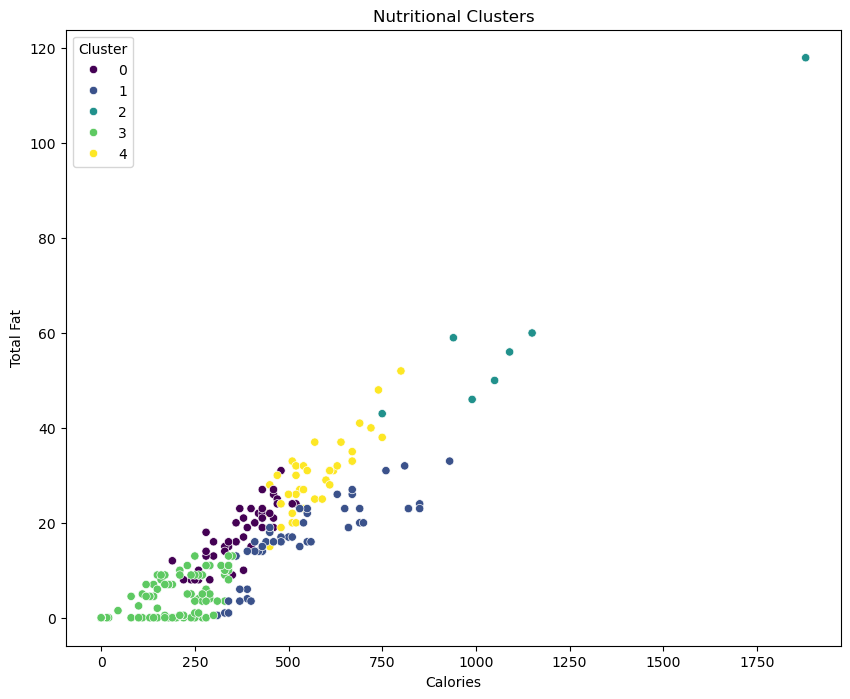

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Calories', 'Total Fat', 'Sugars', 'Protein']])

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Calories', y='Total Fat', hue='Cluster', data=df, palette='viridis')
plt.title('Nutritional Clusters')
plt.show()

In [37]:
# Forecasting
# Predict impact of reducing saturated fat
df['New Saturated Fat'] = df['Saturated Fat'] * 0.8
df['New Health Risk Score'] = df['New Saturated Fat'] + df['Sodium'] + df['Sugars']
print("Impact of Reducing Saturated Fat:\n", df[['Item', 'Health Risk Score', 'New Health Risk Score']])

Impact of Reducing Saturated Fat:
                                                   Item  Health Risk Score  \
0                                         Egg McMuffin              758.0   
1                                    Egg White Delight              776.0   
2                                     Sausage McMuffin              790.0   
3                            Sausage McMuffin with Egg              872.0   
4                     Sausage McMuffin with Egg Whites              890.0   
..                                                 ...                ...   
255                 McFlurry with Oreo Cookies (Small)              353.0   
256                McFlurry with Oreo Cookies (Medium)              477.0   
257                 McFlurry with Oreo Cookies (Snack)              239.0   
258  McFlurry with Reese's Peanut Butter Cups (Medium)              518.0   
259   McFlurry with Reese's Peanut Butter Cups (Snack)              259.0   

     New Health Risk Score  
0          

In [43]:
athlete_items = df[(df['Protein'] > 20) & (df['Sugars'] < 10)]
print("Items Suitable for Athletes:\n", athlete_items[['Item', 'Protein', 'Sugars']])

Items Suitable for Athletes:
                                                 Item  Protein  Sugars
3                          Sausage McMuffin with Egg       21       2
4                   Sausage McMuffin with Egg Whites       21       2
5                               Steak & Egg McMuffin       26       3
18             Steak & Egg Biscuit (Regular Biscuit)       25       3
24                         Bacon, Egg & Cheese Bagel       30       7
25         Bacon, Egg & Cheese Bagel with Egg Whites       30       8
26                         Steak, Egg & Cheese Bagel       33       7
27                   Big Breakfast (Regular Biscuit)       28       3
28                     Big Breakfast (Large Biscuit)       28       3
29   Big Breakfast with Egg Whites (Regular Biscuit)       26       3
30     Big Breakfast with Egg Whites (Large Biscuit)       26       4
42                                           Big Mac       24       9
46                            Quarter Pounder Deluxe       2

In [41]:
athlete_items.to_csv(os.path.join(output_dir, 'items_suitable_for_athletes.csv'), index=False)